<a href="https://colab.research.google.com/github/mervyn18/Internship/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import tweepy as tw #for accessing Twitter API,


#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load Tweet dataset-------------twitter-and-reddit-sentimental-analysis-dataset
df1 = pd.read_csv('/content/Twitter_Data.csv.zip')
# Output first five rows
df1.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df2 = pd.read_csv('/content/Reddit_Data.csv.zip')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
# Output first five rows

df2.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [ ]:
df3 = pd.read_csv('/content/finalSentimentdata2.csv')
df3 = df3.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df3['category'] = df3['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df3 = df3.drop(['Unnamed: 0'], axis=1)
# Output first five rows
df3.head()

,category,clean_text
0,-1.0,agree the poor in india are treated badly thei...
1,1.0,if only i could have spent the with this cutie...
2,1.0,will nature conservation remain a priority in ...
3,-1.0,coronavirus disappearing in italy show this to...
4,-1.0,uk records lowest daily virus death toll since...


In [ ]:
df4 = pd.read_csv('/content/apple-twitter-sentiment-texts.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
# Output first five rows

df2.head()


,clean_text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [ ]:
df4 = pd.read_csv('/content/Tweets.csv.zip')
df4 = df4.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df4['category'] = df4['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df4 = df4[['category','clean_text']]
# Output first five rows
df4.head()

,category,clean_text
0,0.0,@VirginAmerica What @dhepburn said.
1,1.0,@VirginAmerica plus you've added commercials t...
2,0.0,@VirginAmerica I didn't today... Must mean I n...
3,-1.0,@VirginAmerica it's really aggressive to blast...
4,-1.0,@VirginAmerica and it's a really big bad thing...


In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
# Check for missing data
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [ ]:
df.groupby('category').count().plot(kind='bar')

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

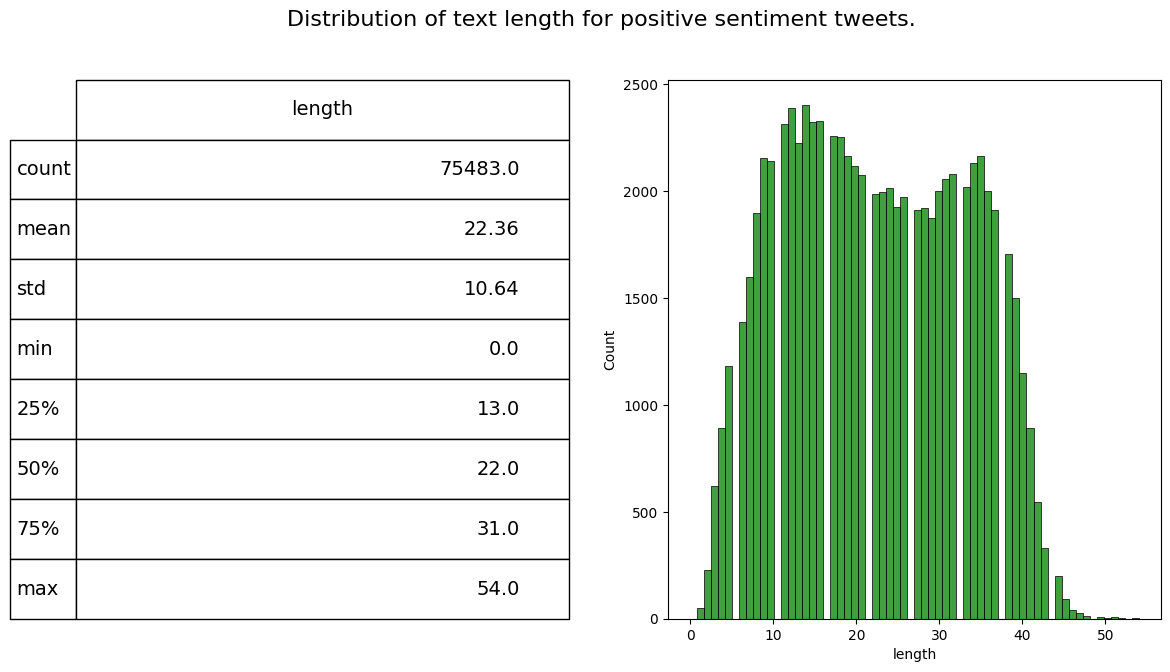

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(14, 7))

# Check for NaN values in 'clean_text' column
df['length'] = df['clean_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

ax1 = fig.add_subplot(122)
sns.histplot(df[df['category'] == 'Positive']['length'], ax=ax1, color='green')

describe = df['length'][df['category'] == 'Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

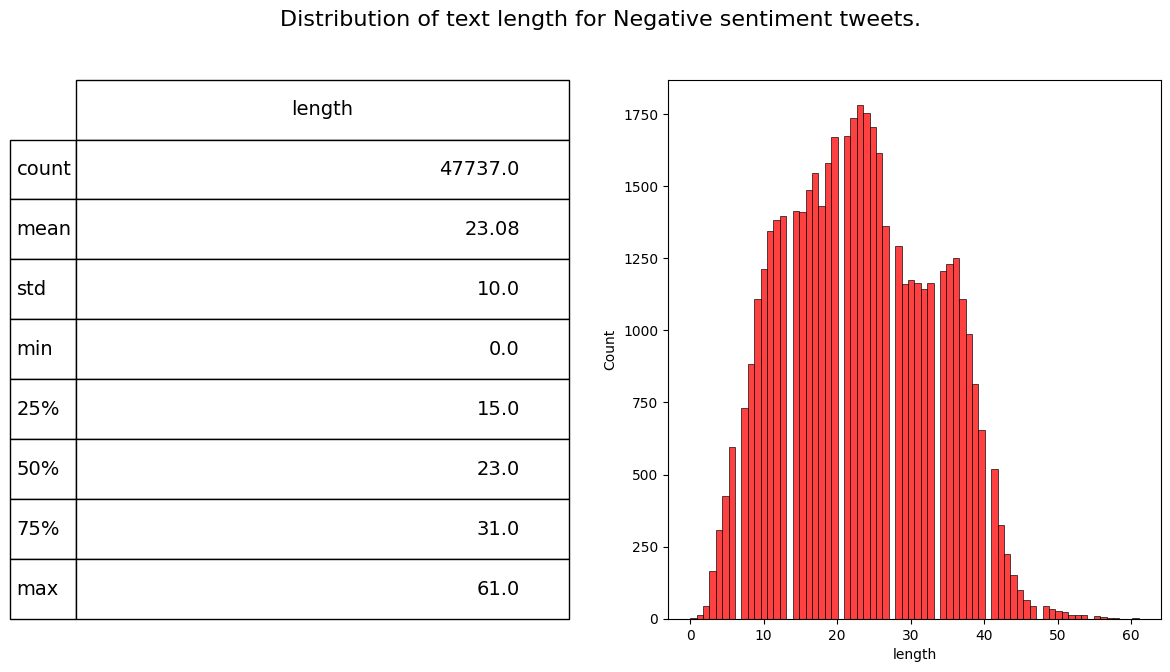

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(14, 7))

# Check for NaN values in 'clean_text' column
df['length'] = df['clean_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

ax1 = fig.add_subplot(122)
sns.histplot(df[df['category'] == 'Negative']['length'], ax=ax1, color='red')

describe = df['length'][df['category'] == 'Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [ ]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
182335  @AmericanAir thank you we got on a different f...  Positive
182336  @AmericanAir leaving over 20 minutes Late Flig...  Negative
182337  @AmericanAir Please bring American Airlines to...   Neutral
182338  @AmericanAir you have my money, you change my ...  Negative
182339  @AmericanAir we have 8 ppl so we need 2 know h...   Neutral

[182340 rows x 2 columns]>

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Assuming you have already imported the necessary libraries and have the DataFrame 'df'

def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

# Example usage
print("\nOriginal tweet ->", df['clean_text'][0])
processed_words = tweet_to_words(df['clean_text'][0])
print("\nProcessed tweet ->", processed_words)


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


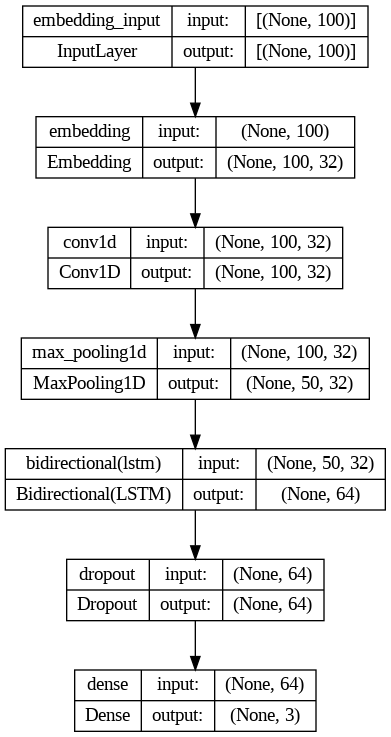

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras import datasets
import tensorflow as tf

vocab_size = 5000
embedding_size = 32
max_len = 100  # Assuming you have defined max_len

learning_rate = 0.1
epochs = 20
decay_rate = learning_rate / epochs
momentum = 0.8

# Use ExponentialDecay for decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=epochs,
    decay_rate=decay_rate,
    staircase=True)

sgd = SGD(learning_rate=lr_schedule, momentum=momentum, nesterov=False)

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
max_len = 10

# Build model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Print model summary
print(model.summary())

# Compile model with 'sparse_categorical_crossentropy'
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 32)            160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 32)             0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(history.history['acc'])
    ax[0].plot(history.history['val_acc'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['Train', 'Validation'], loc='best')



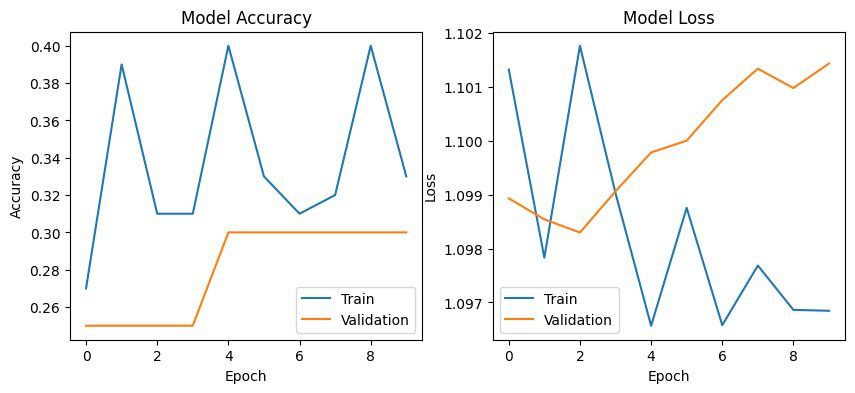

In [ ]:
def plot_training_hist(history):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Check if 'accuracy' and 'val_accuracy' keys exist
    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        ax[0].plot(history.history['accuracy'])
        ax[0].plot(history.history['val_accuracy'])
        ax[0].set_title('Model Accuracy')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Accuracy')
        ax[0].legend(['Train', 'Validation'], loc='best')

    # Check if 'acc' and 'val_acc' keys exist
    elif 'acc' in history.history and 'val_acc' in history.history:
        ax[0].plot(history.history['acc'])
        ax[0].plot(history.history['val_acc'])
        ax[0].set_title('Model Accuracy')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('Accuracy')
        ax[0].legend(['Train', 'Validation'], loc='best')

    # Plot loss
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['Train', 'Validation'], loc='best')

# Call the plot_training_hist function
plot_training_hist(history)